# Aplicación de Modelos de ML para lograr predecir el rendimientos de Arándanos Silvestres

![Banner](https://raw.githubusercontent.com/MayumyCH/blueberry_yield_prediction_with_python/main/resources/img/Arandano_banner.jpg)
_Este Proyecto toma como base la [data](https://www.kaggle.com/saurabhshahane/wild-blueberry-yield-prediction/version/1) proporcionada por Kaggle para el tema de los rendimientos de los arándanos; con esta información se busca predecir el rendimiento de los Arándanos silvestres 🐍📈._


### **Importación de Librerias**

In [ ]:
# LIBRERIA GENERAL
import numpy as np
import pandas as pd
import datetime as dt

# LIBRERIA GRAFICOS
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import altair as alt

# LIBRERIAS MODELO
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import metrics # METRICAS MODELOS

## 1.- 🔎 Comprensión del Negocio

- Una de las tareas más desafiantes en el Sector Agricola es **"predecir con precisión el rendimiento de los cultivos**".
- La data proporcionada pertenece a un modelo de simulación espacialmente explícito validado por observación de campo y datos experimentales en Maine duranto los ultimos 30 años.
- Por lo anterior comentado se apunta a dar una posible solución y poder predecir el rendimiento de los Arándanos Silvetres.

## 2.- 📁 Comprensión de los datos

Este dataset se encuentra en Kaggle; contiene 16 variables que se detallarán a continuación:

| VARIABLE | DESCRIPCIÓN                |
| :-------- | :------------------------- |
| clonesize |  El tamaño promedio del clon de arándanos en el campo |
| honeyBee |  Densidad de abejas en el campo|
| bumblesBee |  Densidad de abejorros en el campo |
| andrenaBee |  Densidad de abejas andrenas en el campo |
| osmiaBee |  Densidad de abejas osmia en el campo |
| MaxTempBS |  El registro más alto de la temperatura del aire diaria de la banda superior durante la temporada de floración |
| MinTempBS |  El registro más bajo de la temperatura del aire diaria de la banda superior |
| AverageTempBS |  El promedio de la temperatura del aire diaria de la banda superior |
| MaxTempBI |  El registro más alto de la temperatura del aire diaria de la banda inferior |
| MinTempBI |  El registro más bajo de la temperatura del aire diaria de la banda inferior |
| AverageTempBI | El promedio de la temperatura del aire diaria de la banda inferior |
| RainingDays | El número total de días durante la temporada de floración, cada uno de los cuales tiene una precipitación mayor que cero |
| AverageRainingDays |  El promedio de días de lluvia de toda la temporada de floración |
| fruitset | Número de frutos  |
| fruitmass | Masa de frutos |
| seeds | Semilla del fruto   |
| yield | Rendimiento - Variable a predecir  |

### 2.1 ⏳ Recopilacion de los datos

In [ ]:
# IMPORTAR los datos desde Computador
# url_data = "dataset/BlueberryData.csv"

url_data = 'https://raw.githubusercontent.com/MayumyCH/blueberry_yield_prediction_with_python/main/dataset/BlueberryData.csv'

df_blueberry = pd.read_csv(url_data)
df_blueberry.head(2)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663


In [ ]:
# Eliminando la columna "Row#" debido a que no esta brindando información util
df_blueberry.drop('Row#', axis='columns', inplace=True)

In [ ]:
# Renombrando las columnas para tener un mejor entendimiento de las variables
df_blueberry.rename(columns={'honeybee': 'honeyBee','bumbles': 'bumblesBee','andrena':'andrenaBee',
                             'osmia':'osmiaBee',
                             'MaxOfUpperTRange':'MaxTempBS','MinOfUpperTRange':'MinTempBS',
                             'AverageOfUpperTRange':'AverageTempBS',
                             'MaxOfLowerTRange':'MaxTempBI','MinOfLowerTRange':'MinTempBI',
                             'AverageOfLowerTRange':'AverageTempBI'
                            }, inplace=True)

In [ ]:
df_blueberry.head(8)

,clonesize,honeyBee,bumblesBee,andrenaBee,osmiaBee,MaxTempBS,MinTempBS,AverageTempBS,MaxTempBI,MinTempBI,AverageTempBI,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
5,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.309669,0.366284,27.345454,2825.003738
6,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.284443,0.352186,26.101179,2625.269164
7,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.246568,0.342826,25.042361,2379.905214


### 2.2 📊 Analisis exploratorios (EDA) 

In [ ]:
df_blueberry.shape

# INTERPRETACION:
# 777 observaciones
# 17 features/variables

(777, 17)

In [ ]:
df_blueberry.info()

# INTERPRETACION:
# 17 Features tipo Numericos (float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   clonesize           777 non-null    float64
 1   honeyBee            777 non-null    float64
 2   bumblesBee          777 non-null    float64
 3   andrenaBee          777 non-null    float64
 4   osmiaBee            777 non-null    float64
 5   MaxTempBS           777 non-null    float64
 6   MinTempBS           777 non-null    float64
 7   AverageTempBS       777 non-null    float64
 8   MaxTempBI           777 non-null    float64
 9   MinTempBI           777 non-null    float64
 10  AverageTempBI       777 non-null    float64
 11  RainingDays         777 non-null    float64
 12  AverageRainingDays  777 non-null    float64
 13  fruitset            777 non-null    float64
 14  fruitmass           777 non-null    float64
 15  seeds               777 non-null    float64
 16  yield   

In [ ]:
df_blueberry.isnull().sum()
# Este dataset no tiene valores Nulos

clonesize             0
honeyBee              0
bumblesBee            0
andrenaBee            0
osmiaBee              0
MaxTempBS             0
MinTempBS             0
AverageTempBS         0
MaxTempBI             0
MinTempBI             0
AverageTempBI         0
RainingDays           0
AverageRainingDays    0
fruitset              0
fruitmass             0
seeds                 0
yield                 0
dtype: int64

In [ ]:
# DESCRIPCION DE LOS DATOS NUMERICOS
# df_blueberry.describe().T 
df_blueberry.describe()

,clonesize,honeyBee,bumblesBee,andrenaBee,osmiaBee,MaxTempBS,MinTempBS,AverageTempBS,MaxTempBI,MinTempBI,AverageTempBI,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


#### ➡️ Variable target "yield"

In [ ]:
df_blueberry["yield"].describe() 

# INTERPRETACION:
# Solo el 25% del rendimiento sobrepasa los 7022 kilos/Ha
# Se obtuvo como min rendimiento 1637 kilos/Ha 
# Se obtuvo como max rendimiento 8969 kilos/Ha 
# EL 50% del rendimiento se encuentra entre [5124.85 y 7022.19]

count     777.000000
mean     6012.849165
std      1356.955318
min      1637.704022
25%      5124.854901
50%      6107.382466
75%      7022.189731
max      8969.401842
Name: yield, dtype: float64

In [ ]:
# Veamos lo anterior con graficos
fig = make_subplots(rows=1, cols=2, subplot_titles=['yield Box', 'yield Histograma'])

fig.add_trace(go.Box(y=df_blueberry['yield'], name='yield',boxpoints='all',
                marker_color = 'indianred'), row=1, col=1)
fig.add_trace(go.Histogram(x=df_blueberry['yield'], 
                           nbinsx=15, marker_color='rgb(9,56,125)'), row=1, col=2)
fig.update_layout(title_text="Variable target 'yield' - Diagrama de caja y Histograma")
fig.show()

####➡️  Variable predictoras


Veamos nuestras variables predictoras respecto a nuestra variable a Predecir "Yield".

Se busca ver la correlacion (Evaluar la relacion que existe entre 2 variables)

In [ ]:
df_blueberry.columns

Index(['clonesize', 'honeyBee', 'bumblesBee', 'andrenaBee', 'osmiaBee',
       'MaxTempBS', 'MinTempBS', 'AverageTempBS', 'MaxTempBI', 'MinTempBI',
       'AverageTempBI', 'RainingDays', 'AverageRainingDays', 'fruitset',
       'fruitmass', 'seeds', 'yield'],
      dtype='object')

In [ ]:
import plotly.figure_factory as ff

df = df_blueberry.corr().round(2)
fig = ff.create_annotated_heatmap( df.values.tolist(),
                                    x=df.columns.values.tolist(),
                                    y=df.index.values.tolist(),
                                    colorscale='Earth') # Earth - Viridis
# fig.update_layout(title_text='Mapa de calor de correlación de las Variables Predictoras')
fig['data'][0]['showscale'] = True
fig.show()

In [ ]:
# Ordenando de mayor a menor para saber cuales son las variables mas predictivas
df['yield'].sort_values(ascending= False)

yield                 1.00
fruitset              0.98
seeds                 0.96
fruitmass             0.93
osmiaBee              0.38
bumblesBee            0.31
andrenaBee            0.14
honeyBee             -0.04
MinTempBS            -0.18
AverageTempBS        -0.18
MinTempBI            -0.18
AverageTempBI        -0.18
MaxTempBI            -0.19
MaxTempBS            -0.19
clonesize            -0.52
AverageRainingDays   -0.54
RainingDays          -0.54
Name: yield, dtype: float64

In [ ]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

In [ ]:
def grafico_Correlacion(data):
  g = sns.PairGrid(data, aspect=1.4, diag_sharey=False)
  g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
  g.map_diag(sns.distplot, kde_kws={'color': 'black'})
  g.map_upper(corrdot)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/d

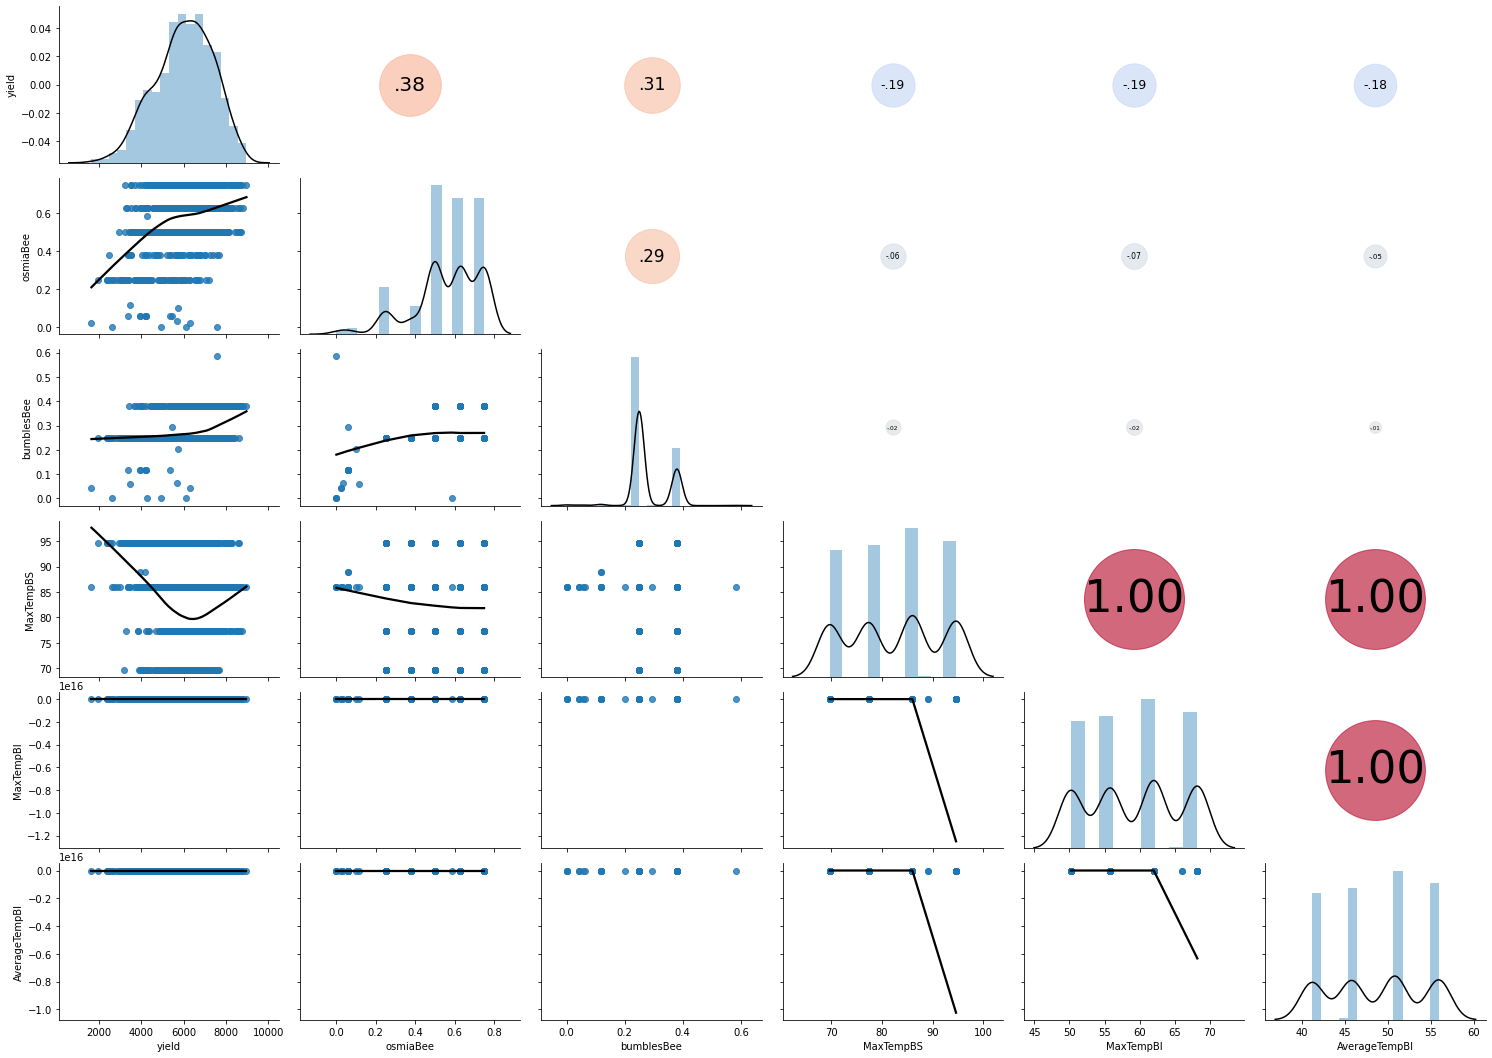

In [ ]:
data = df_blueberry[["yield","osmiaBee","bumblesBee","MaxTempBS","MaxTempBI","AverageTempBI"]]
grafico_Correlacion(data)


# INTERPRETACION:
# Con esta grafica podemos ver las variables que tienen que ver con el tipo de abeja 
# Tienen un poquito mas de prediccion respecto a las variable que provienen
# de la temperatura - banda superior

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

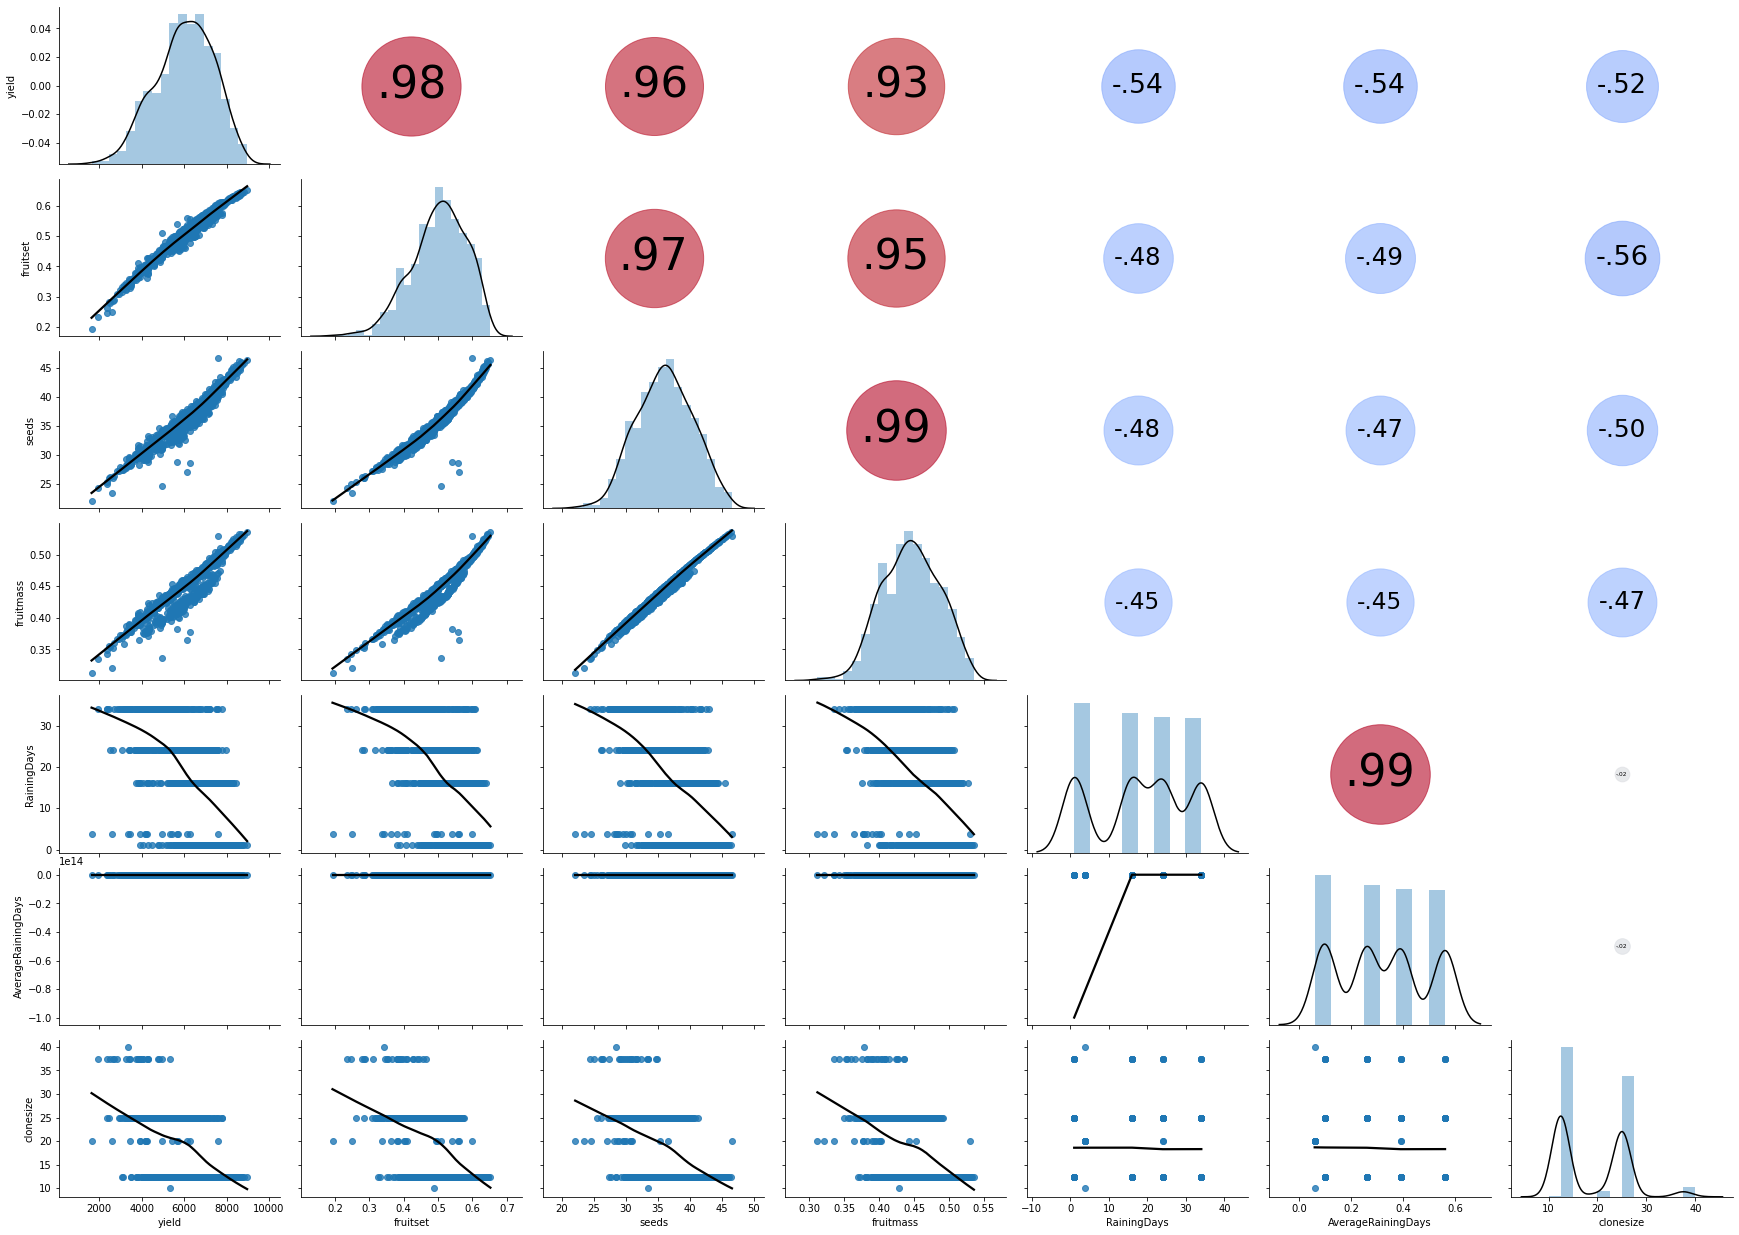

In [ ]:
# sns.set(style='white', font_scale=1.2)
data = df_blueberry[["yield","fruitset","seeds","fruitmass","RainingDays","AverageRainingDays","clonesize"]]
grafico_Correlacion(data)

# INTERPRETACION:
# Con esta grafica podemos ver las variables que tienen mas explicabilidad son:
# "fruitset","seeds","fruitmass" con una relacion de mas de 90
# La otras variables que tambien apoyarian son:
# "RainingDays","AverageRainingDays","clonesize estan tienen un valor de mas de 50

**Finalidad de tener un mapa de calor con respecto a la correlación**

- Identificar relaciones entre variables que podemos analizar más a fondo.
- Las relaciones entre las variables son cruciales para el aprendizaje automático porque necesitamos usar funciones con poder predictivo

/usr/local/lib/python3.7/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

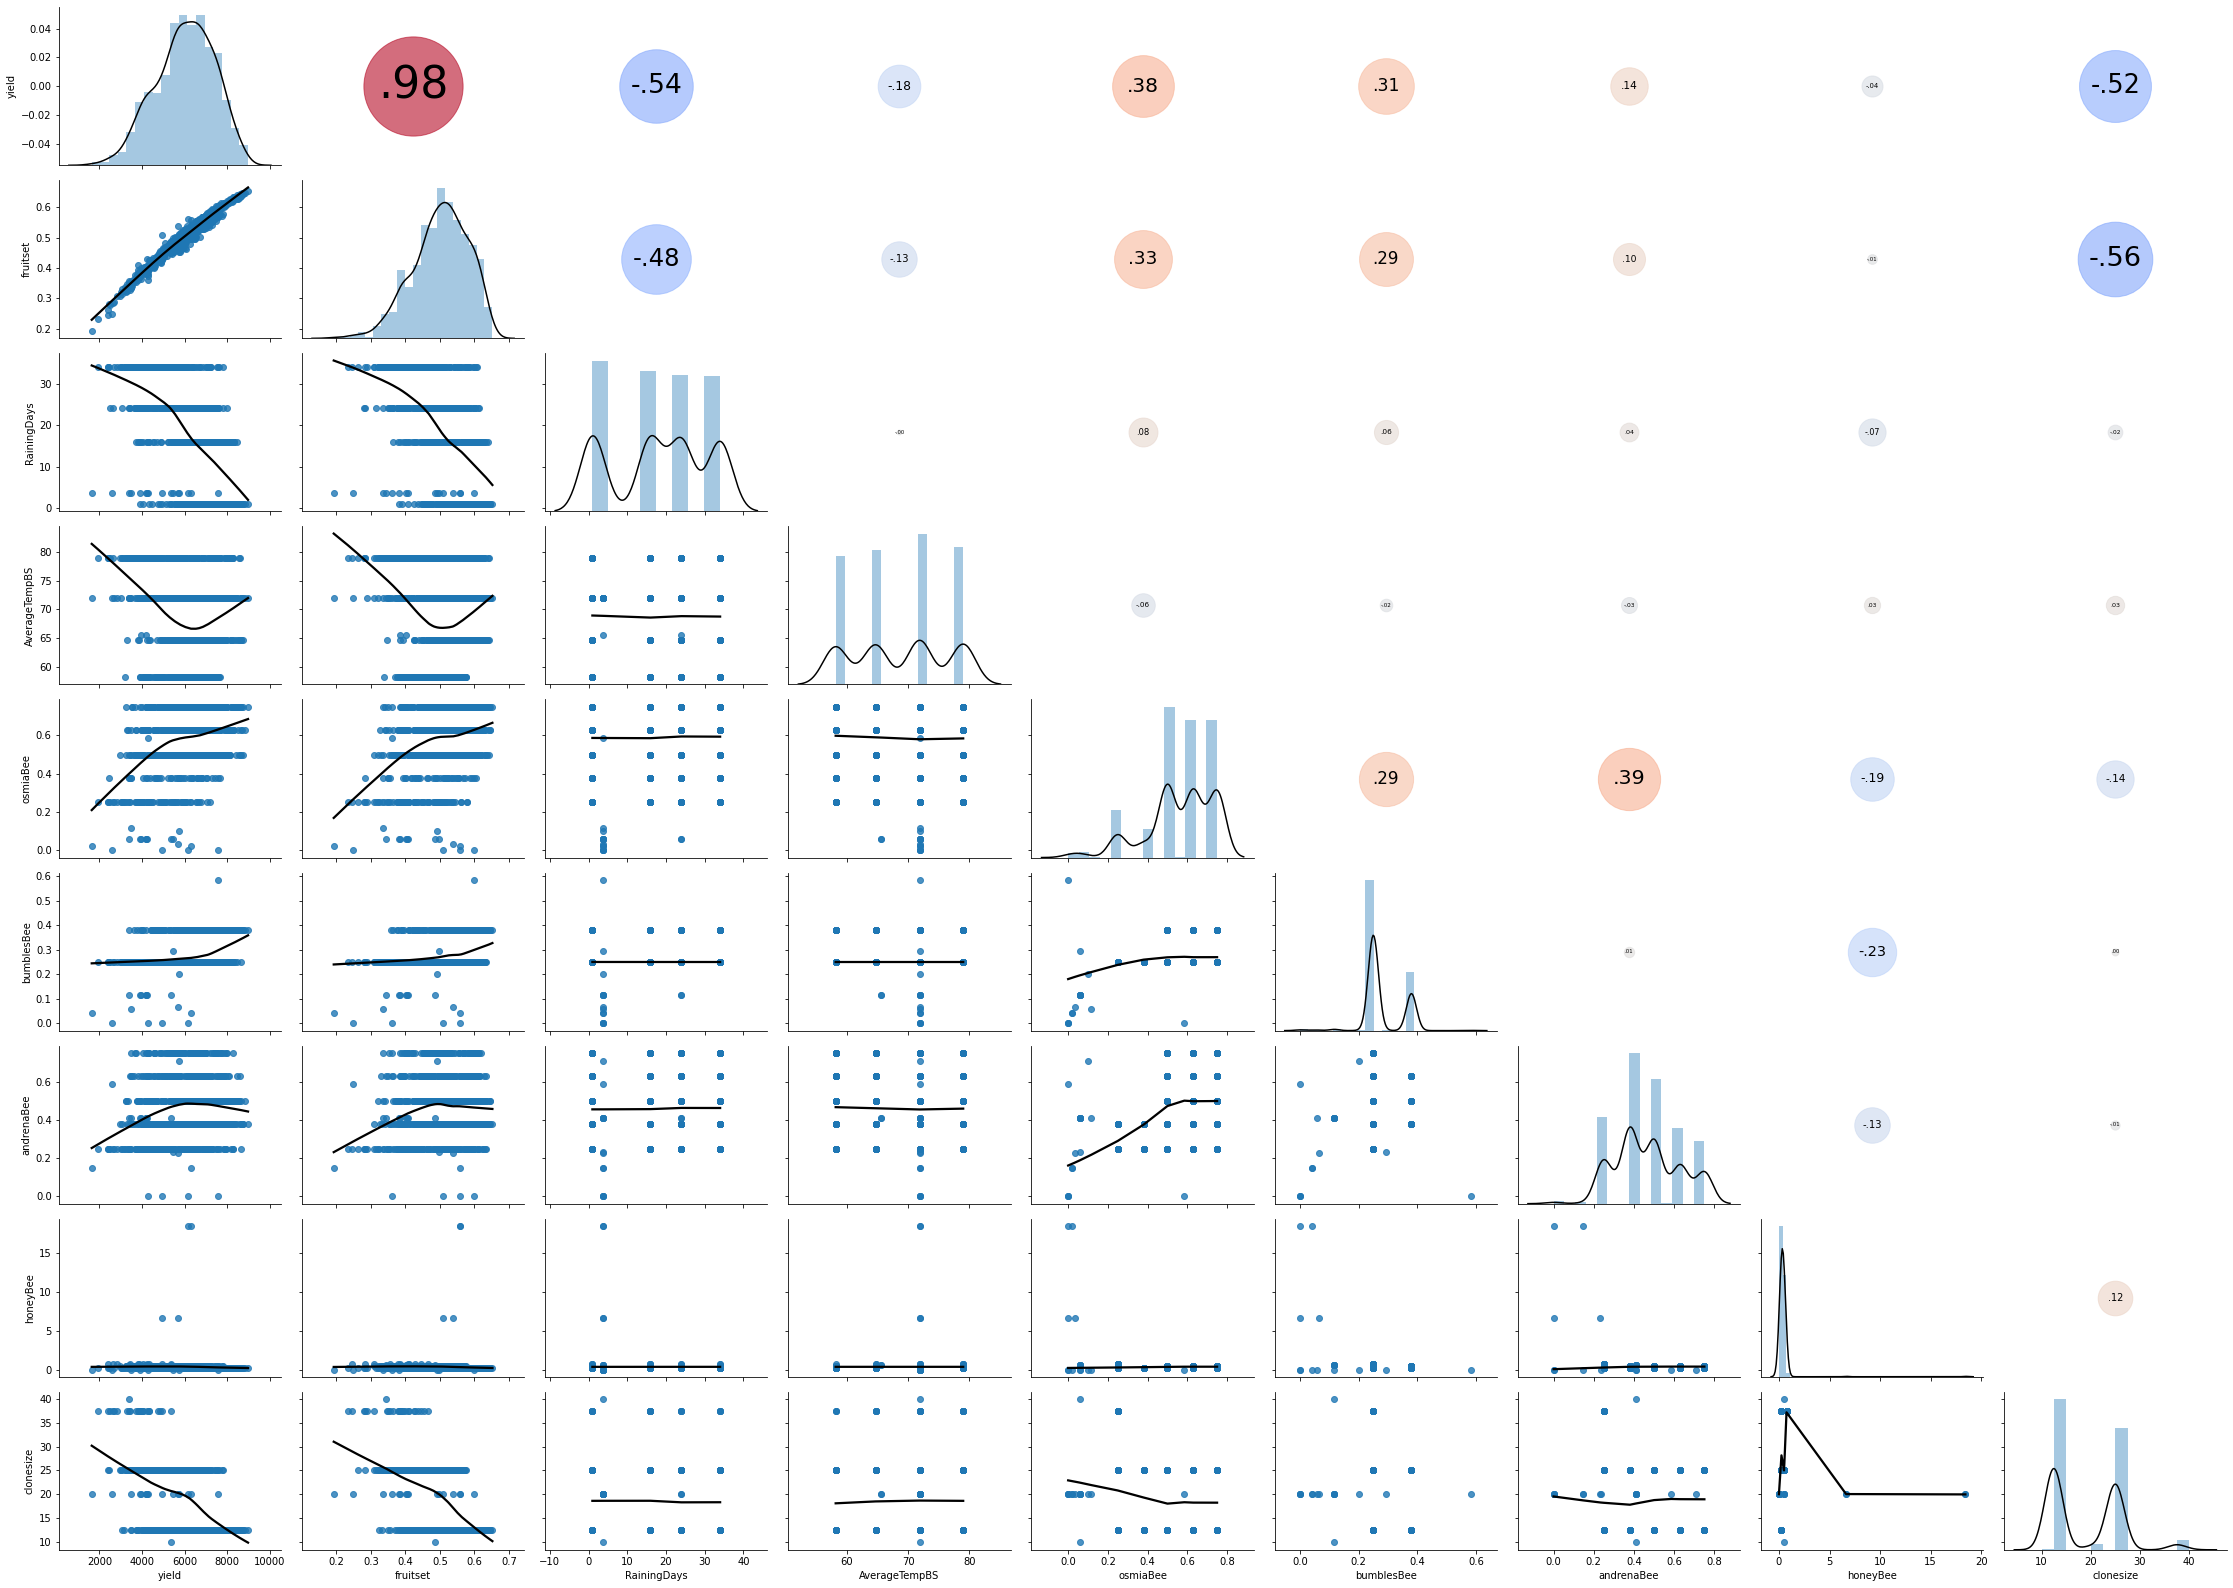

In [ ]:
# Nos quedaremos con las variables que tengan buena correlacion con el target y que no esten correlacionada con otras variables predictoras

data = df_blueberry[["yield","fruitset","RainingDays","AverageTempBS", "osmiaBee","bumblesBee","andrenaBee","honeyBee","clonesize"]]

grafico_Correlacion(data)

# INTERPRETACION:
# Con esta grafica podemos ver las variables que tienen mas explicabilidad son:
# "fruitset","seeds","fruitmass" con una relacion de mas de 90
# La otras variables que tambien apoyarian son:
# "RainingDays","AverageRainingDays","clonesize estan tienen un valor de mas de 50

In [ ]:
data.corr()['yield'].round(2)

yield            1.00
fruitset         0.98
RainingDays     -0.54
AverageTempBS   -0.18
osmiaBee         0.38
bumblesBee       0.31
andrenaBee       0.14
honeyBee        -0.04
clonesize       -0.52
Name: yield, dtype: float64

In [ ]:
df_blueberry = df_blueberry[["fruitset","RainingDays","AverageTempBS", "osmiaBee","bumblesBee","andrenaBee","honeyBee","clonesize","yield"]]
df_blueberry.head(6)

,fruitset,RainingDays,AverageTempBS,osmiaBee,bumblesBee,andrenaBee,honeyBee,clonesize,yield
0,0.410652,16.0,71.9,0.25,0.25,0.25,0.75,37.5,3813.165795
1,0.444254,1.0,71.9,0.25,0.25,0.25,0.75,37.5,4947.605663
2,0.383787,16.0,79.0,0.25,0.25,0.25,0.75,37.5,3866.798965
3,0.407564,1.0,79.0,0.25,0.25,0.25,0.75,37.5,4303.943030
4,0.354413,24.0,71.9,0.25,0.25,0.25,0.75,37.5,3436.493543
5,0.309669,34.0,71.9,0.25,0.25,0.25,0.75,37.5,2825.003738


In [ ]:
df_blueberry.shape

(777, 9)

## 3.-  🛠️ Preparación de los datos

In [ ]:
# COMPLETAR O ELIMINAR LOS DATOS NULOS SI HUBIERAN

In [ ]:
# ELIMINAR DATOS CON EL APOYO DEL RANGO INTERCUARTIL

In [ ]:
# Datos Iniciales
df_blueberry.shape

(777, 9)

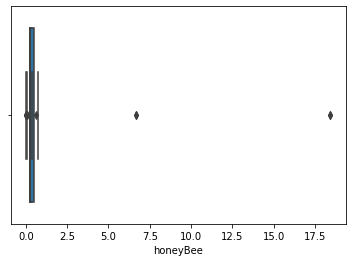

In [ ]:
sns.boxplot(x=df_blueberry['bumblesBee'])
sns.boxplot(x=df_blueberry['honeyBee'])

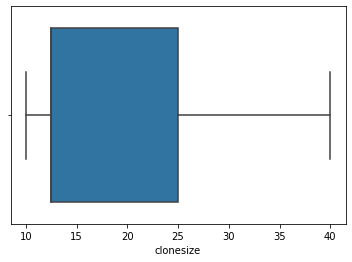

In [ ]:
sns.boxplot(x=df_blueberry['clonesize'])

In [ ]:
# Quitando valores outlier con el rango intercuartilico
q1 = df_blueberry.quantile(0.25) # 1er Cuartil
q3 = df_blueberry.quantile(0.75) # 3er Cuartil
iqr = q3 -q1
print(iqr)

fruitset            0.106571
RainingDays        20.230000
AverageTempBS       7.200000
osmiaBee            0.250000
bumblesBee          0.130000
andrenaBee          0.250000
honeyBee            0.250000
clonesize          12.500000
yield            1897.334830
dtype: float64


In [ ]:
df_blueberry = df_blueberry[~((df_blueberry < (q1 - 1.5 * iqr)) |(df_blueberry > (q3 + 1.5 * iqr))).any(axis=1)]
df_blueberry.shape

(752, 9)

In [ ]:
# De 777 nos quedamos con 752 registros eliminando aquellos outlier que pasaba el rango intercuartilico

### 🕵️ Feature Selection

In [ ]:
df_blueberry.columns

Index(['fruitset', 'RainingDays', 'AverageTempBS', 'osmiaBee', 'bumblesBee',
       'andrenaBee', 'honeyBee', 'clonesize', 'yield'],
      dtype='object')

## 4.- 📈 Modelado


In [ ]:
# EVALUANDO ERRORES
def evaluate_metrics(true, predicted):
    print('-'*50)

    # Calculando el Error
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))

    r2_square = metrics.r2_score(true, predicted)

    # print("Error Absoluto Medio (MAE)") # Que tan alejados estan mis valores reales de los predichos
    print("Linear Regression Performance on the test set: MAE = {:.02f}".format(mae))

    print("Linear Regression Performance on the test set: MSE = {:.02f}".format(mse)) # No se interpreta

    # print("\nCalculando la Raiz del Error Cuadratico Medio (RMSE)")
    print("Linear Regression Performance on the test set: RMSE = {:.02f}".format(rmse)) # Raiz de MSE
    # Que tan alejados estan mis valores reales de los predichos
    # Mas penalizador
    # Diferencia entre los valores reales y los valores predichos

    print("r2_square= {:.02f}".format(r2_square)) 
    # Que tanto estamos logrando predecir el modelo

In [ ]:
# Separar Variables
X = df_blueberry.drop(columns="yield") # Variables predictoras
y = df_blueberry["yield"] # Variables Target o Objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=88) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=88)
 
# 30% Seran mis datos de prueba 

In [ ]:
print("Tamaño del X_train",X_train.shape, "\nTamaño del X_test ",X_test.shape)
print("--")
print("Tamaño del y_train",y_train.shape, "\nTamaño del y_test ",y_test.shape)

Tamaño del X_train (526, 8) 
Tamaño del X_test  (226, 8)
--
Tamaño del y_train (526,) 
Tamaño del y_test  (226,)


In [ ]:
# IMPORTANDO LOS DIFERENTES MODELOS DE REGRESION
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

In [ ]:
def fit_and_evaluate(model, viewMetrics=False):
    
    model.fit(X_train, y_train) # Entrenamiento del modelo
    
    # Predecir y evaluar
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)

    model_rmse= np.sqrt(metrics.mean_squared_error(y_train, model_pred_train)) 
    # Buscar el menor error con el TRAIN

    if viewMetrics:
      print('Calculando los errores en la data del TRAIN')
      evaluate_metrics(y_train,model_pred_train)

      print('\nCalculando los errores en la data del TEST')
      evaluate_metrics(y_test,model_pred_test)
    else:
      print("Rendimiento de Regresión en la deta del TEST: RMSE = {:.02f}".format(model_rmse))


    # Retornar la metrica del rendimiento
    return model_rmse

In [ ]:
# MODELO DUMMY
basic_pred_train = np.median(X_train)
basic_baseline_rmse =  np.sqrt(np.mean((y_train - basic_pred_train)**2))

In [ ]:
# REGRESION LINEAL
lr = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'
lr_rmse = fit_and_evaluate(lr,True)

Calculando los errores en la data del TRAIN
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 110.10
Linear Regression Performance on the test set: MSE = 19436.71
Linear Regression Performance on the test set: RMSE = 139.42
r2_square= 0.99

Calculando los errores en la data del TEST
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 108.76
Linear Regression Performance on the test set: MSE = 19807.47
Linear Regression Performance on the test set: RMSE = 140.74
r2_square= 0.99


In [ ]:
# SVM - MAQUINA DE SOPORTE VECTORIAL
svm = SVR(C = 1000, gamma=0.1)
svm_rmse = fit_and_evaluate(svm,True)

Calculando los errores en la data del TRAIN
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 377.59
Linear Regression Performance on the test set: MSE = 260933.22
Linear Regression Performance on the test set: RMSE = 510.82
r2_square= 0.84

Calculando los errores en la data del TEST
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 463.40
Linear Regression Performance on the test set: MSE = 354524.08
Linear Regression Performance on the test set: RMSE = 595.42
r2_square= 0.80


In [ ]:
# RANDOMFOREST REGRESION
from sklearn.ensemble import RandomForestRegressor
params = {
    'n_estimators' : [25, 50, 75, 100, 150, 200, 250],
    'max_depth' : [2, 4, 6, 8, 10, 12]  
}

# Aplicando GridSearchCV para encontrar los mejores parametros para mi Random Forest
random_forest_regresor = GridSearchCV(RandomForestRegressor(random_state=88), params)
random_forest_rmse = fit_and_evaluate(random_forest_regresor,True)

print("/n", random_forest_regresor.best_params_) # Mejores parametros
print(random_forest_regresor.best_score_)

Calculando los errores en la data del TRAIN
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 44.30
Linear Regression Performance on the test set: MSE = 3245.62
Linear Regression Performance on the test set: RMSE = 56.97
r2_square= 1.00

Calculando los errores en la data del TEST
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 115.84
Linear Regression Performance on the test set: MSE = 20808.20
Linear Regression Performance on the test set: RMSE = 144.25
r2_square= 0.99
/n {'max_depth': 10, 'n_estimators': 200}
0.9850259434470086


In [ ]:
# GRADIENTE BOOSTING
gradient_boosting = GradientBoostingRegressor(random_state=88)
gradient_boosting_rmse = fit_and_evaluate(gradient_boosting,True)

Calculando los errores en la data del TRAIN
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 67.96
Linear Regression Performance on the test set: MSE = 7957.75
Linear Regression Performance on the test set: RMSE = 89.21
r2_square= 1.00

Calculando los errores en la data del TEST
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 102.71
Linear Regression Performance on the test set: MSE = 16820.82
Linear Regression Performance on the test set: RMSE = 129.70
r2_square= 0.99


In [ ]:
# LightGBM
lightGBM = lgb.LGBMRegressor(random_state=88)
lightGBM_rmse = fit_and_evaluate(lightGBM,True)

Calculando los errores en la data del TRAIN
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 63.83
Linear Regression Performance on the test set: MSE = 6996.73
Linear Regression Performance on the test set: RMSE = 83.65
r2_square= 1.00

Calculando los errores en la data del TEST
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 111.72
Linear Regression Performance on the test set: MSE = 19144.20
Linear Regression Performance on the test set: RMSE = 138.36
r2_square= 0.99


In [ ]:
# KNN - VECINOS CERCANOS
knn = KNeighborsRegressor(n_neighbors=10)
knn_rmse = fit_and_evaluate(knn,True)

Calculando los errores en la data del TRAIN
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 339.93
Linear Regression Performance on the test set: MSE = 202538.27
Linear Regression Performance on the test set: RMSE = 450.04
r2_square= 0.88

Calculando los errores en la data del TEST
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 410.91
Linear Regression Performance on the test set: MSE = 270055.08
Linear Regression Performance on the test set: RMSE = 519.67
r2_square= 0.85


In [ ]:
# RIDGE <> REGRESION CON CRESTAS
ridge = Ridge(alpha=10)
ridge_rmse = fit_and_evaluate(ridge,True)

Calculando los errores en la data del TRAIN
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 513.61
Linear Regression Performance on the test set: MSE = 387396.73
Linear Regression Performance on the test set: RMSE = 622.41
r2_square= 0.76

Calculando los errores en la data del TEST
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 503.35
Linear Regression Performance on the test set: MSE = 362889.61
Linear Regression Performance on the test set: RMSE = 602.40
r2_square= 0.79


In [ ]:
# XGB REGRESSOR
rXGB = XGBRegressor()
rXGB_rmse = fit_and_evaluate(rXGB,True)

[01:29:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Calculando los errores en la data del TRAIN
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 70.66
Linear Regression Performance on the test set: MSE = 8517.41
Linear Regression Performance on the test set: RMSE = 92.29
r2_square= 0.99

Calculando los errores en la data del TEST
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 102.98
Linear Regression Performance on the test set: MSE = 16560.00
Linear Regression Performance on the test set: RMSE = 128.69
r2_square= 0.99


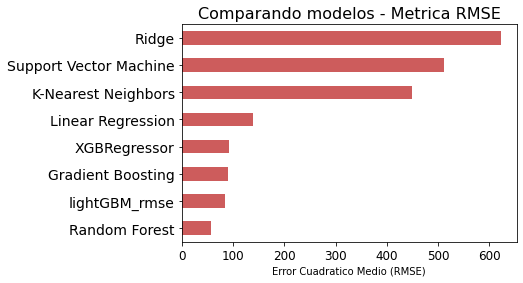

In [ ]:
# COMPARAR LOS MODELOS PARA ESCOGER EL MEJOR
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Ridge","XGBRegressor","lightGBM_rmse"],
                                 "diff": ["-{:.2f}%".format((1 - lr_rmse / basic_baseline_rmse) * 100), 
                                          "-{:.2f}%".format((1 - svm_rmse / basic_baseline_rmse) * 100),
                                          "-{:.2f}%".format((1 - random_forest_rmse / basic_baseline_rmse) * 100),
                                          "-{:.2f}%".format((1 - gradient_boosting_rmse / basic_baseline_rmse) * 100),
                                          "-{:.2f}%".format((1 - knn_rmse / basic_baseline_rmse) * 100),
                                          "-{:.2f}%".format((1 - ridge_rmse / basic_baseline_rmse) * 100),
                                          "-{:.2f}%".format((1 - rXGB_rmse / basic_baseline_rmse) * 100),
                                          "-{:.2f}%".format((1 - lightGBM_rmse / basic_baseline_rmse) * 100),
                                          ],
                                 "rmse": [lr_rmse, svm_rmse, random_forest_rmse, 
                                         gradient_boosting_rmse, knn_rmse, ridge_rmse,rXGB_rmse,lightGBM_rmse]})


model_comparison.sort_values("rmse", ascending=True).plot(x="model", y="rmse", kind="barh",
                                                           color="indianred", legend=False) # indianred - lightskyblue

plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Error Cuadratico Medio (RMSE)"); plt.xticks(size=12)
plt.title("Comparando modelos - Metrica RMSE", size=16);

### 🎯 Mejor modelo

Menor error RMSE

In [ ]:
# Nos quedamos con el modelo que nos de menor error
# RANDOM FOREST REGRESOR

# Los mejores parametros:
random_forest_regresor = RandomForestRegressor(random_state=0,n_estimators=200,max_depth=10)
random_forest_rmse = fit_and_evaluate(random_forest_regresor,True)

model_pred_train = random_forest_regresor.predict(X_train)
model_pred_test = random_forest_regresor.predict(X_test)

Calculando los errores en la data del TRAIN
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 44.73
Linear Regression Performance on the test set: MSE = 3260.00
Linear Regression Performance on the test set: RMSE = 57.10
r2_square= 1.00

Calculando los errores en la data del TEST
--------------------------------------------------
Linear Regression Performance on the test set: MAE = 115.95
Linear Regression Performance on the test set: MSE = 20784.35
Linear Regression Performance on the test set: RMSE = 144.17
r2_square= 0.99


In [ ]:
print(random_forest_regresor.feature_importances_)

[0.98063945 0.00439193 0.00623866 0.00261443 0.00152987 0.00229351
 0.00130933 0.00098283]


In [ ]:
# Features con mas importancia en el modelo
importances_table = pd.concat([pd.DataFrame({'Feature':list(df_blueberry.columns)}),
                              pd.DataFrame({'Importance':list(random_forest_regresor.feature_importances_)})], axis = 1)
importances_variables = importances_table[['Feature','Importance']].sort_values('Importance', ascending = False).reset_index(drop = True)
importances_variables


,Feature,Importance
0,fruitset,0.980639
1,AverageTempBS,0.006239
2,RainingDays,0.004392
3,osmiaBee,0.002614
4,andrenaBee,0.002294
5,bumblesBee,0.001530
6,honeyBee,0.001309
7,clonesize,0.000983
8,yield,NaN


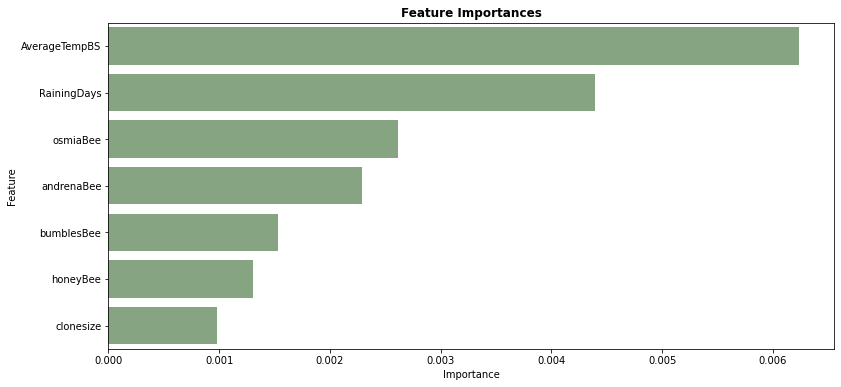

In [ ]:
grafImportVariable = importances_variables.drop([0, 8]) # [0, 8]

fig, ax = plt.subplots()
fig.set_size_inches(13,6)
ax.set_title('Feature Importances', weight='bold')
sns.barplot(x="Importance", y="Feature", data=grafImportVariable,  color="#83aa7c")
plt.show()

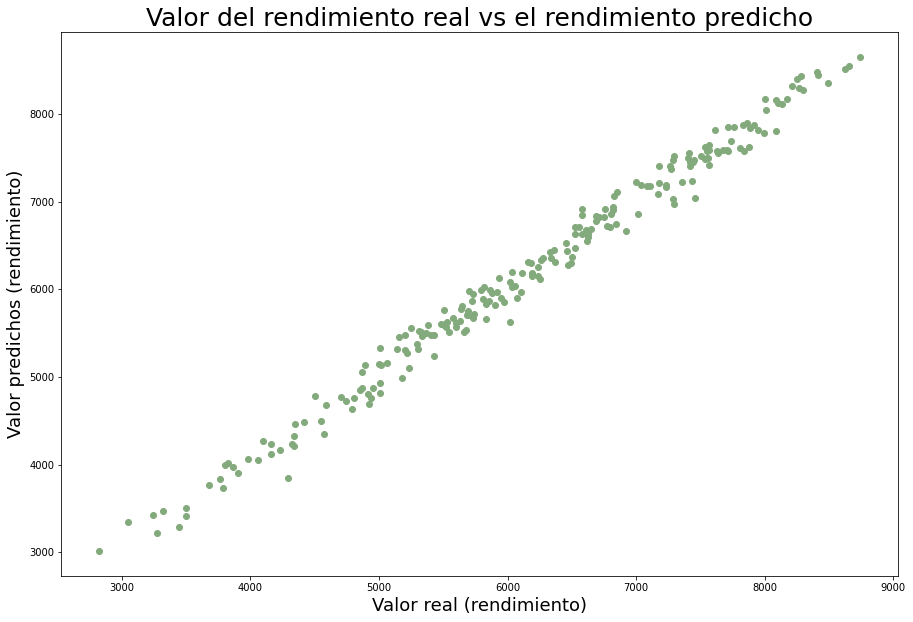

In [ ]:
# GRAFICO PARA VERIFICAR NUESTRO RENDIMIENTO PREDICCION VS RENDIMIENTO REAL
plt.figure(figsize=(15,10))
plt.title("Valor del rendimiento real vs el rendimiento predicho",fontsize=25)
plt.xlabel("Valor real (rendimiento)",fontsize=18)
plt.ylabel("Valor predichos (rendimiento)", fontsize=18)
plt.scatter(x=y_test,y=model_pred_test, color="#83aa7c");

### 🔥 Guardando el mejor modelo


In [ ]:
# Exportando nuestro modelo
import dill
dill.settings['recurse'] = True

import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(random_forest_regresor, f) # Guardar el flujo

print("Se guardo el mejor modelo !!")

Se guardo el mejor modelo !!
